<h1>Read MCNP Output</h1>
<h3>Reads the output from the MCNP simulation and analyzes the data.</h3>

In [17]:
#Imports
from math import *
import cmath
import numpy as np
import scipy as sp
import scipy.special
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as IPdisplay
import sys
import os

#Import custom modules
from physics import *

sns.set(font_scale=2.0)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')

%matplotlib notebook

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<h2>Defined functions for the espec</h2>

In [2]:
B0 = 2136.0 #Magnetic field strength in Gauss
B0 = B0/10**4
yM = 0.5*.0254

def Radius(KE):
    '''Radius of electron orbit in m given KE in keV'''
    return me*c/(q*B0)*np.sqrt(1-(1/(KE*1000*q/(me*c**2)+1))**2)*(KE*1000*q/(me*c**2)+1)

def AngleIncidence(KE):
    R = Radius(KE)
    return np.arcsin((R-yM)/R)

<h2>Create array of kinetic energies and angles</h2>

In [3]:
KEstepsize = 0.01
KEsim = np.arange(0.15,3.00+KEstepsize,KEstepsize)
CosThetaSim = np.cos(AngleIncidence(KEsim*1000))
#CosThetaSim = np.cos(np.zeros(len(KEsim))) #Normal incidence

<h2>Read MCNP output files and add the energy deposited in the active layer into an array along with its associated error</h2>

In [4]:
mass = 2.95680*10**-2 #mass of active layer in g
Nsegments = 101 #number of segments
segmentmass = mass/Nsegments #mass of each segment in g
phosphorthickness = 81.*10**-6 #thickness of active layer in m
Eabsorbed = []
EabsorbedError = []
FractionAbsorbed = []
MCNP_Directory = '/home/drake/Documents/Physics/Research/Python/MCNP_Code'
for i in range(len(KEsim)):
    #Directory of the input files
    directory = MCNP_Directory + '/MCNP_Decks/Output/2136Gauss_Oblique_Incidence/Out_{KE}MeV_{Theta}Degrees'\
    .format(KE=str(round(KEsim[i],3)),Theta=str(round(np.arccos(CosThetaSim[i])*360/(2*pi),1)))
    
    printflag = False
    with open(directory) as searchfile:
        for line in searchfile:
            left,sep,right = line.partition('whole cell')
            if printflag:
                Eabs_per_g = float(line[17:28])
                Eabs_per_g_Error = float(line[29:35])
                Eabsorbed.append(Eabs_per_g*mass)
                EabsorbedError.append(Eabs_per_g_Error*mass)
                FractionAbsorbed.append(Eabs_per_g*mass/KEsim[i])
                printflag = False
            if sep: # True iff 'whole cell' in line
                printflag = True

<h2>Read MCNP output files and add the energy deposited in the photoactive CCD layer into an array along with its associated error</h2>

In [5]:
EphAbsorbedCCD = [] #x-rays
EphAbsorbedCCDError = []
EelAbsorbedCCD = [] #electrons
EelAbsorbedCCDError = []
CCDmass = 2.09610*10**-4 #mass of photoactive layer of CCD
for i in range(len(KEsim)):
    #Directory of the input files
    directory = MCNP_Directory + '/MCNP_Decks/Output/2136Gauss_Oblique_Incidence/Out_{KE}MeV_{Theta}Degrees'\
    .format(KE=str(round(KEsim[i],3)),Theta=str(round(np.arccos(CosThetaSim[i])*360/(2*pi),1)))
    
    printflag = False
    with open(directory) as searchfile:
        firstoccurence = False
        for line in searchfile:
            left,sep,right = line.partition('cell  6')
            if printflag:
                Eabs_per_g = float(line[17:28])
                Eabs_per_g_Error = float(line[29:35])
                if firstoccurence:
                    EphAbsorbedCCD.append(Eabs_per_g*CCDmass)
                    EphAbsorbedCCDError.append(Eabs_per_g_Error*CCDmass)
                else:
                    EelAbsorbedCCD.append(Eabs_per_g*CCDmass)
                    EelAbsorbedCCDError.append(Eabs_per_g_Error*CCDmass)
                printflag = False
            if sep: # True iff 'cell  6' in line
                printflag = True
                firstoccurence = not firstoccurence

## No lanex case

In [7]:
# EphAbsorbedCCD_No_Lanex = [] #x-rays
# EphAbsorbedCCDError_No_Lanex = []
# EelAbsorbedCCD_No_Lanex = [] #electrons
# EelAbsorbedCCDError_No_Lanex = []
# CCDmass = 2.09610*10**-4 #mass of photoactive layer of CCD
# for i in range(len(KEsim)):
#     #Directory of the input files
#     directory = '/home/drake/Desktop/Physics/Research/Python/MCNP_Code/MCNP_Decks/Output/1.5um_CCD_No_Lanex_Output/Out_{KE}MeV_{Theta}Degrees'\
#     .format(KE=str(round(KEsim[i],3)),Theta=str(round(np.arccos(CosThetaSim[i])*360/(2*pi),1)))
    
#     printflag = False
#     with open(directory) as searchfile:
#         firstoccurence = False
#         for line in searchfile:
#             left,sep,right = line.partition('cell  2')
#             if printflag:
#                 Eabs_per_g = float(line[17:28])
#                 Eabs_per_g_Error = float(line[29:35])
#                 if firstoccurence:
#                     EphAbsorbedCCD_No_Lanex.append(Eabs_per_g*CCDmass)
#                     EphAbsorbedCCDError_No_Lanex.append(Eabs_per_g_Error*CCDmass)
#                 else:
#                     EelAbsorbedCCD_No_Lanex.append(Eabs_per_g*CCDmass)
#                     EelAbsorbedCCDError_No_Lanex.append(Eabs_per_g_Error*CCDmass)
#                 printflag = False
#             if sep: # True iff 'cell  6' in line
#                 printflag = True
#                 firstoccurence = not firstoccurence

<h2>Read MCNP output files and add the energy deposited in each segment of the phosphor layer into an array along with its associated error</h2>

In [8]:
deptharray= []
Eabsorbed_Segments = []
Eabsorbed_Segments_Error = []
for i in range(len(KEsim)):
    deptharray.append([])
    Eabsorbed_Segments.append([])
    Eabsorbed_Segments_Error.append([])
    
    #Directory of the input files
    directory = MCNP_Directory + '/MCNP_Decks/Output/2136Gauss_Oblique_Incidence/Out_{KE}MeV_{Theta}Degrees'\
    .format(KE=str(round(KEsim[i],3)),Theta=str(round(np.arccos(CosThetaSim[i])*360/(2*pi),1)))

    for segmentnumber in range(Nsegments-1):
        segment = segmentnumber+100 #segment number
        deptharray[i].append(segmentnumber*phosphorthickness/Nsegments) #depth for each segment in microns
        printflag = False
        with open(directory) as searchfile:
            for line in searchfile:
                left,sep,right = line.partition('       -{segmentlabel}  '.format(segmentlabel=str(segment)))
                if printflag:
                    Eabs_per_g = float(line[17:28])
                    Eabs_per_g_Error = float(line[29:35])
                    Eabsorbed_Segments[i].append(Eabs_per_g*segmentmass)
                    Eabsorbed_Segments_Error[i].append(Eabs_per_g_Error*segmentmass)
                    printflag = False
                if sep:
                    printflag = True

<h2>Calculate number of photons that reach the CCD</h2>

In [9]:
scatteringlength = 2.84*10**-6 #photon scattering length in Gd2O2S in m
conversionefficiency = 0.16 #electron energy to light energy conversion efficiency
emissionwavelength = 545*10**-9 #lanex emission wavelength in m
emissionenergy = hbar*2*pi*c/emissionwavelength
photonNumberArray = []
for i in range(len(KEsim)):
    photonNumber = 0
    for j in range(len(deptharray[i])):
        photonNumber += conversionefficiency*Eabsorbed_Segments[i][j]*10**6*q/emissionenergy\
        *(j+0.5)/Nsegments # Nabs = Nexc*(Distance from top of lanex)/(Phosphor thickness)
        #where Distance from top of lanex = (SegmentNumber+0.5)/(Nsegments)*(Phosphor thickness)

    photonNumberArray.append(photonNumber)

<h2>Plot total energy absorbed in the phosphor layer</h2>

<IPython.core.display.Javascript object>


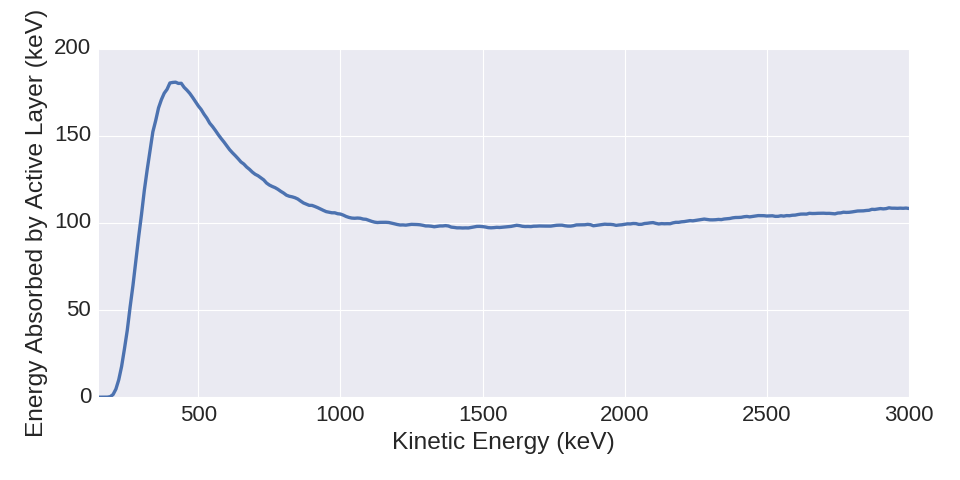

In [19]:
plt.subplots(figsize=(12,6))
plt.plot(np.multiply(KEsim,10**3),np.multiply(Eabsorbed,10**3),linewidth=3)
plt.xlim(150,3000)
plt.ylim(0)
plt.xlabel('Kinetic Energy (keV)')
plt.ylabel('Energy Absorbed by Active Layer (keV)')
plt.tight_layout()

<h2>Plot energy absorbed by each segment of the phoshpor layer for various energies</h2>

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


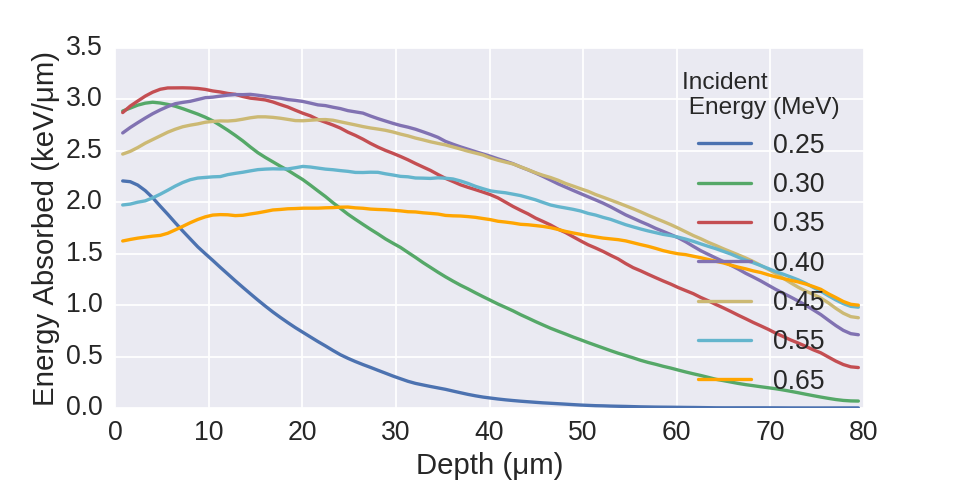

In [13]:
plt.subplots(figsize=(12,6))
SegmentThickness = phosphorthickness/Nsegments*10**6 #Segment thickness in meters
Eabs_Seg_Smoothed_10 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[10][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_15 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[15][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_20 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[20][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_25 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[25][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_30 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[30][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_40 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[40][1:]),11,3),10**3/SegmentThickness)
Eabs_Seg_Smoothed_50 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[50][1:]),11,3),10**3/SegmentThickness)
#Eabs_Seg_Smoothed_290 = np.multiply(savitzky_golay(np.array(Eabsorbed_Segments[290][1:]),11,3),10**3/SegmentThickness)

plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_10,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[10]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_15,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[15]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_20,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[20]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_25,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[25]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_30,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[30]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_40,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[40]))
plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_50,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[50]),color='orange')
#plt.plot(np.multiply(deptharray[0][1:],10**6),Eabs_Seg_Smoothed_290,linewidth=3,label='{KE:.2f}'.format(KE=KEsim[224]),color='k')
plt.xlabel('Depth (' +  u'\u03bcm)')
plt.ylabel('Energy Absorbed (keV/'+ u'\u03bcm)')
plt.xlim(0)
plt.ylim(0)
plt.subplots_adjust(left=0.12,bottom=0.15) #Adjust spacing to prevent clipping of x and y labels
plt.legend(title='{:<} \n {:<}'.format('Incident','Energy (MeV)'))
plt.show()

<h2>Plot number of photons absorbed by the CCD</h2>

<IPython.core.display.Javascript object>


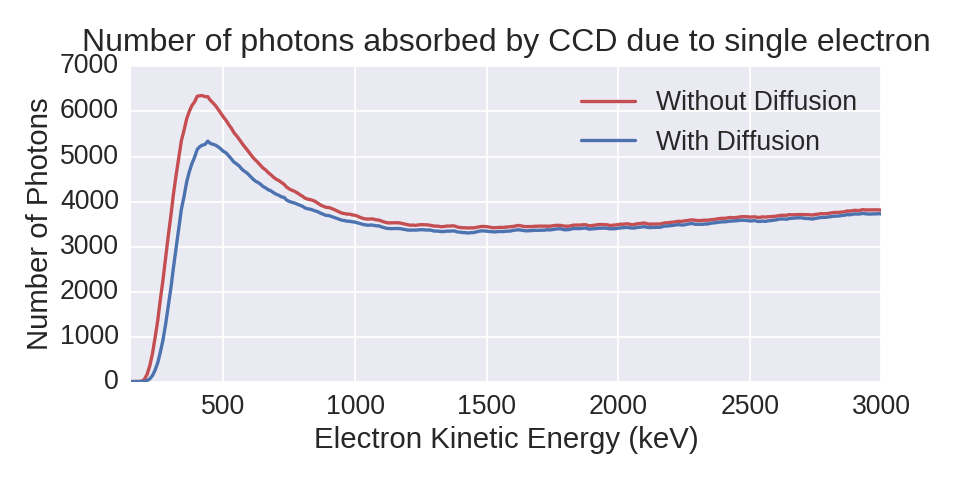

In [16]:
plt.subplots(figsize=(12,6))
plt.plot(np.multiply(KEsim,10**3),np.multiply(Eabsorbed,conversionefficiency*10**6*q/emissionenergy/2),linewidth=3,color='r',label='Without Diffusion')
plt.plot(np.multiply(KEsim,10**3),photonNumberArray,linewidth=3,color='b',label='With Diffusion')
plt.xlabel('Electron Kinetic Energy (keV)')
plt.ylabel('Number of Photons')
plt.xlim(150,3000)
plt.title('Number of photons absorbed by CCD due to single electron',y=1.03)
plt.legend(loc=1)
plt.tight_layout()

<h2>Plot electron and x-ray energy deposited in photoactive layer of CCD</h2>

<IPython.core.display.Javascript object>


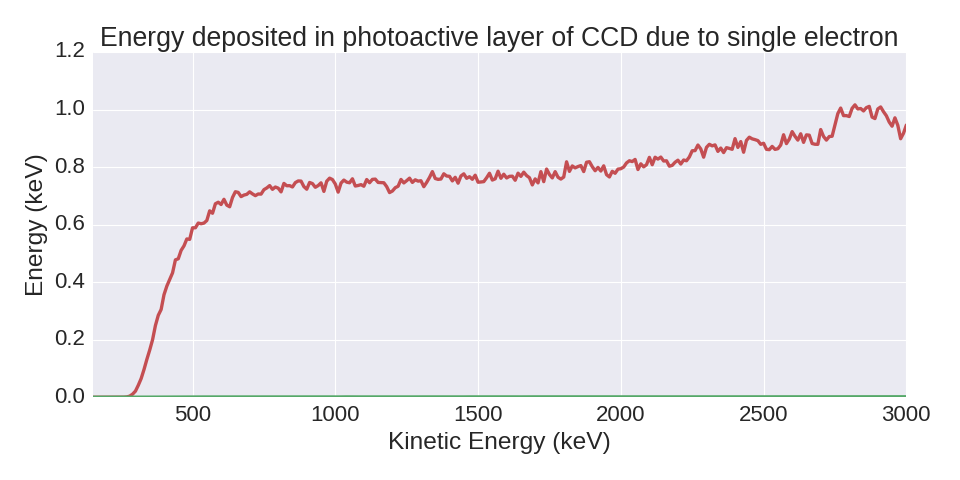

In [20]:
plt.subplots(figsize=(12,6))
plt.plot(np.multiply(KEsim,10**3),np.multiply(EelAbsorbedCCD,10**3),linewidth=3,color='r')
plt.plot(np.multiply(KEsim,10**3),np.multiply(EphAbsorbedCCD,10**3),linewidth=3,color='g')
plt.xlabel('Kinetic Energy (keV)')
plt.ylabel('Energy (keV)')
plt.xlim(150,3000)
plt.title('Energy deposited in photoactive layer of CCD due to single electron')
plt.tight_layout()

## No lanex case

In [21]:
# plt.subplots(figsize=(12,6))
# plt.plot(np.multiply(KEsim,10**3),np.multiply(EelAbsorbedCCD_No_Lanex,10**3),linewidth=3,color='r')
# plt.plot(np.multiply(KEsim,10**3),np.multiply(EphAbsorbedCCD_No_Lanex,10**3),linewidth=3,color='g')
# plt.xlabel('Kinetic Energy (keV)')
# plt.ylabel('Energy (keV)')
# plt.title('Energy deposited in photoactive layer of CCD due to single electron')
# plt.subplots_adjust(left=0.12,bottom=0.14) #Adjust spacing to prevent clipping of x and y labels
# plt.show()

<h2>Plot CCD signal due to photons and electrons</h2>

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


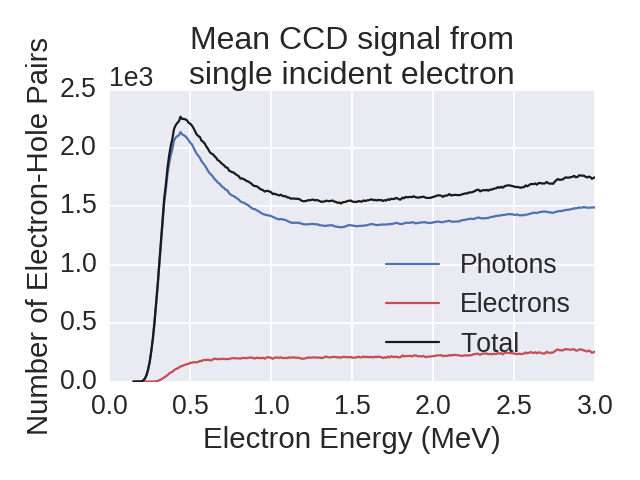

In [23]:
sns.set(context='poster',font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')

Qph = 0.4 #Quantum efficiency for 545 nm photons
Energy_eh_pair = 3.65 #Energy needed to generate electron-hole pair in Si in eV
Total_Signal = np.multiply(photonNumberArray,Qph) + np.multiply(EelAbsorbedCCD,10**6/Energy_eh_pair) + \
                np.multiply(EphAbsorbedCCD,10**6/Energy_eh_pair)
Total_Relative_Signal = Total_Signal/np.max(Total_Signal)
KEarray = np.multiply(KEsim,1.0)
EspecCalibration = np.vstack((KEarray,Total_Relative_Signal))

plt.subplots(figsize=(8,6))

plt.plot(np.multiply(KEsim,1.0),np.multiply(photonNumberArray,Qph),linewidth=2,color='b',label='Photons')
plt.plot(np.multiply(KEsim,1.0),np.multiply(EelAbsorbedCCD,10**6/Energy_eh_pair),linewidth=2,color='r',label='Electrons')
#plt.plot(np.multiply(KEsim,10**3),np.multiply(EphAbsorbedCCD,10**6/Energy_eh_pair),linewidth=2,color='g',label='X-rays')
plt.plot(EspecCalibration[0],np.multiply(np.max(Total_Signal),EspecCalibration[1]),linewidth=2,color='k',label='Total')
#plt.plot(np.multiply(KEsim,1.0),np.multiply(EelAbsorbedCCD_No_Lanex,10**6/Energy_eh_pair),linewidth=2,color='g',label='No Lanex')

plt.xlabel('Electron Energy (MeV)')
plt.ylabel('Number of Electron-Hole Pairs')
plt.xlim(0,3.0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Mean CCD signal from\nsingle incident electron')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=4)
plt.tight_layout()

<h2>Plot total relative CCD signal due to visible photons, electrons, and x-rays</h2>

/home/drake/.anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


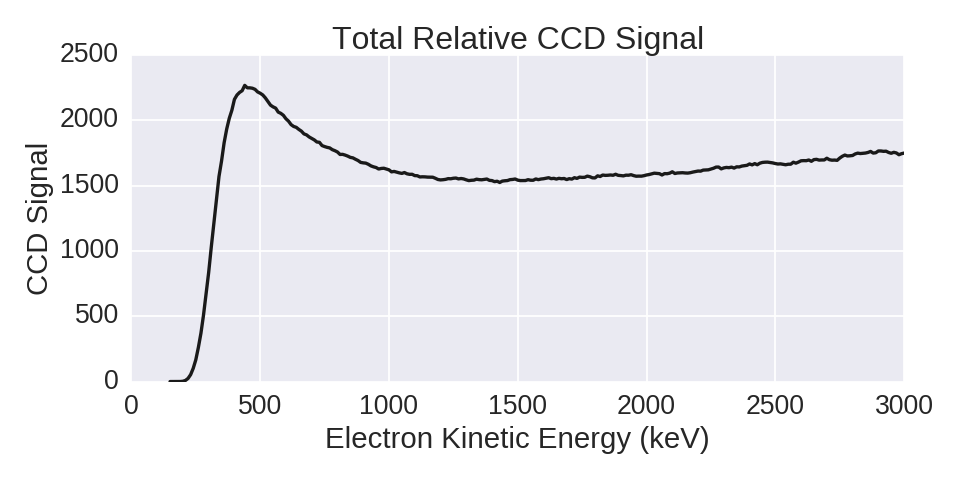

In [24]:
sns.set(context='poster',font_scale=1.5)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')

Total_Signal = np.multiply(photonNumberArray,Qph) + np.multiply(EelAbsorbedCCD,10**6/Energy_eh_pair) + \
np.multiply(EphAbsorbedCCD,10**6/Energy_eh_pair)

plt.subplots(figsize=(12,6))
#plt.plot(np.multiply(KEsim,10**3),Total_Signal/np.max(Total_Signal),linewidth=3,color='k')
plt.plot(np.multiply(KEsim,10**3),Total_Signal,linewidth=3,color='k')
plt.xlabel('Electron Kinetic Energy (keV)')
plt.ylabel('CCD Signal')
plt.title('Total Relative CCD Signal')
plt.xlim(0,3000)
plt.tight_layout()

## Write to csv

In [26]:
Total_Relative_Signal = Total_Signal/np.max(Total_Signal)
KEarray = np.multiply(KEsim,10**3)
EspecCalibration = np.vstack((KEarray,Total_Relative_Signal))

#np.savetxt('Total_Relative_CCD_Signal_vs_Energy_(keV)_Normal_Incidence.csv',np.transpose(EspecCalibration),delimiter=',')